<a href="https://colab.research.google.com/github/cole-beach/California_Housing_Market/blob/main/California_Housing_Market.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [66]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# California Housing Data

I'm going to explore California's median housing prices through a dataset I found on Kaggle. [California Housing Data](https://www.kaggle.com/datasets/dhirajnirne/california-housing-data).

In [98]:
# Imports
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.compose import make_column_transformer, make_column_selector
from sklearn.pipeline import make_pipeline
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import silhouette_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error


from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [68]:
path = '/content/drive/MyDrive/Coding Dojo: Data Science/Portfolio/Zillow/California_Housing.csv'
df = pd.read_csv(path)
df.head(294)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41,880,129.0,322,126,8.3252,452600,NEAR BAY
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,358500,NEAR BAY
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,352100,NEAR BAY
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,341300,NEAR BAY
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,342200,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
289,-122.17,37.78,52,653,128.0,296,121,4.1750,144000,NEAR BAY
290,-122.16,37.77,47,1256,NaN,570,218,4.3750,161900,NEAR BAY
291,-122.16,37.77,48,977,194.0,446,180,4.7708,156300,NEAR BAY
292,-122.16,37.77,45,2324,397.0,968,384,3.5739,176000,NEAR BAY


In [69]:
df.shape

(20640, 10)

In [70]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  int64  
 3   total_rooms         20640 non-null  int64  
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  int64  
 6   households          20640 non-null  int64  
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  int64  
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(4), int64(5), object(1)
memory usage: 1.6+ MB


In [71]:
df['ocean_proximity'].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [72]:
df.isna().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [73]:
df[df.isna().any(axis=1)]

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
290,-122.16,37.77,47,1256,NaN,570,218,4.3750,161900,NEAR BAY
341,-122.17,37.75,38,992,NaN,732,259,1.6196,85100,NEAR BAY
538,-122.28,37.78,29,5154,NaN,3741,1273,2.5762,173400,NEAR BAY
563,-122.24,37.75,45,891,NaN,384,146,4.9489,247100,NEAR BAY
696,-122.10,37.69,41,746,NaN,387,161,3.9063,178400,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20267,-119.19,34.20,18,3620,NaN,3171,779,3.3409,220500,NEAR OCEAN
20268,-119.18,34.19,19,2393,NaN,1938,762,1.6953,167400,NEAR OCEAN
20372,-118.88,34.17,15,4260,NaN,1701,669,5.1033,410700,<1H OCEAN
20460,-118.75,34.29,17,5512,NaN,2734,814,6.6073,258100,<1H OCEAN


In [74]:
# df.dropna(inplace=True)

In [75]:
df.shape

(20640, 10)

In [76]:
df.duplicated().any()

False

In [77]:
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [78]:
# sns.pairplot(data=df, hue='housing_median_age');

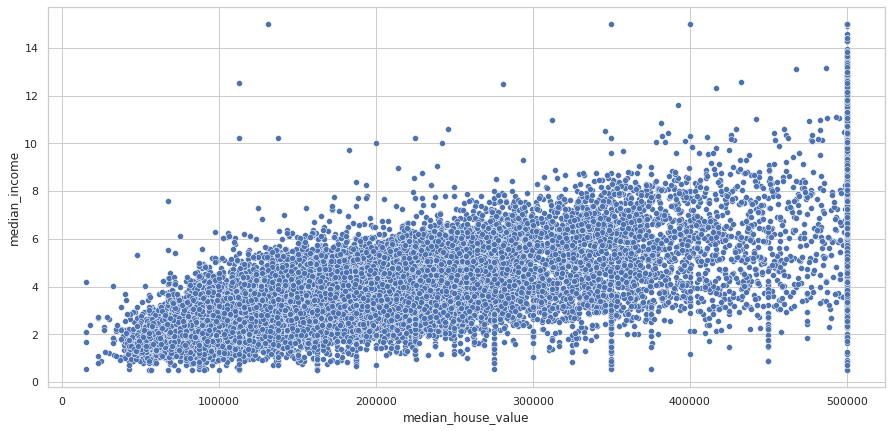

In [111]:
#scatter plot
plt.figure(figsize = (15, 7))
sns.scatterplot(x = df['median_house_value'], y = df['median_income']);

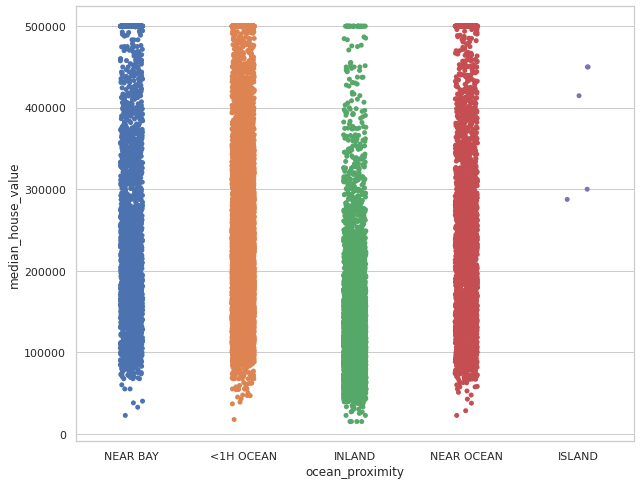

In [113]:
#stripplot like swarm but it loads
plt.figure(figsize = (10,8))
sns.stripplot(x = df['ocean_proximity'], y = df['median_house_value']);

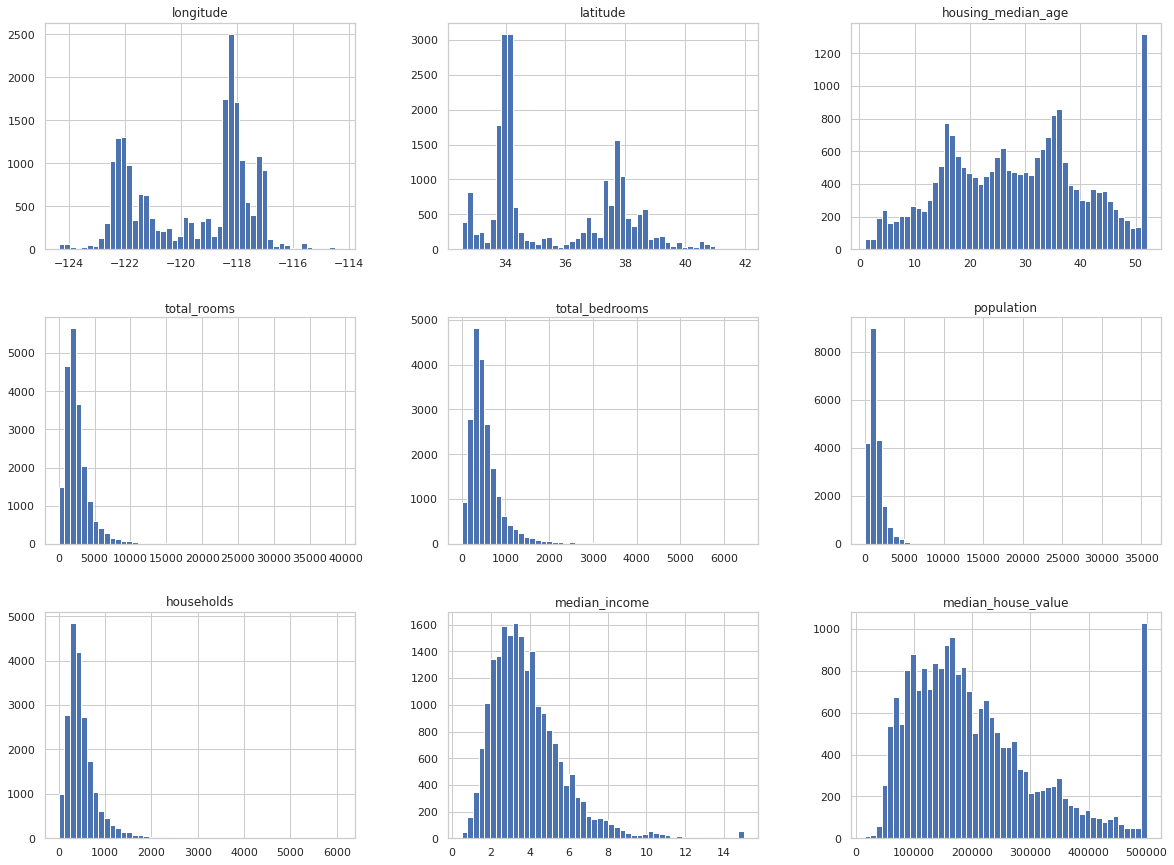

In [115]:
%matplotlib inline
df.hist(bins=50, figsize=(20,15))
plt.show();

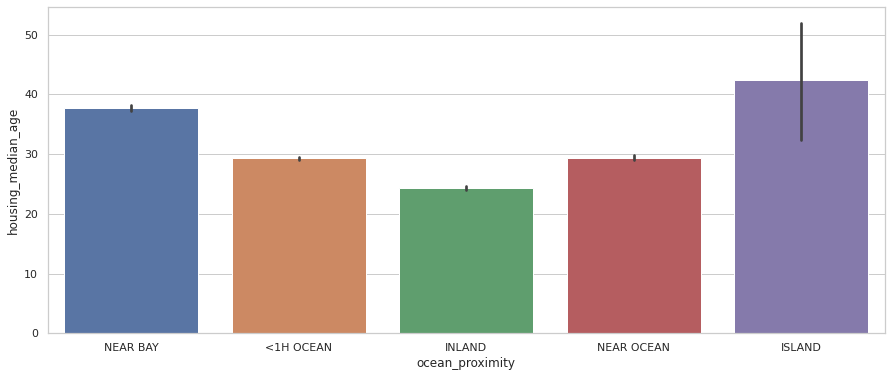

In [80]:
fig, ax = plt.subplots(figsize=(15,6))
sns.set_theme(style="whitegrid")
ax = sns.barplot(x="ocean_proximity", y="housing_median_age", data=df);

## Initial View

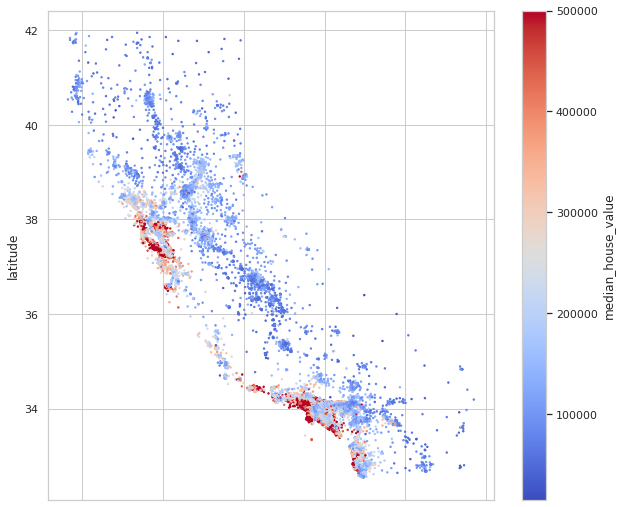

In [81]:
df.plot(kind = 'scatter',x ='longitude',y = 'latitude',c= 'median_house_value',cmap = 'coolwarm',figsize = (10,9),s=2);

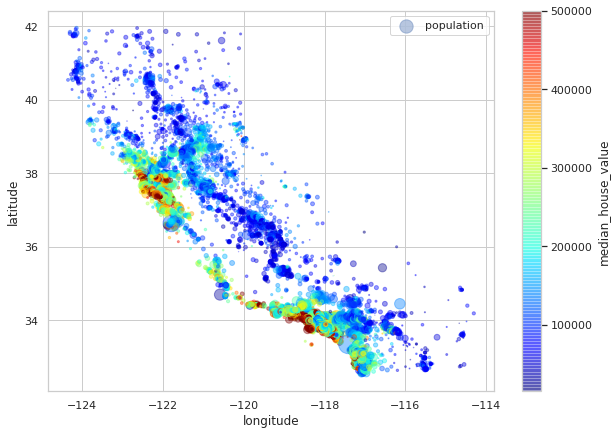

In [118]:
df.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4,
             s=df["population"]/100, label="population", figsize=(10,7),
             c="median_house_value", cmap=plt.get_cmap("jet"), colorbar=True,
             sharex=False)
plt.legend()
plt.show();

This image tells you that the housing prices are very much related to the location (e.g., close to the ocean) and to the population density.

In [ ]:
# Lets use plotly a cool way to show houses on a map

import plotly.express as px
# Documentation: https://plotly.github.io/plotly.py-docs/generated/plotly.express.scatter_mapbox.html

px.scatter_mapbox(df, lat='latitude',lon='longitude',color='median_house_value',
                  mapbox_style="open-street-map",)

From the view on the map above you'll notice that Central Valley (Middle California) offers lower rates, since this is majority farm land, whereas you get closer to the coastal regions the average pice of the homes increase. This isn't true for all of California nice you can see that North of San Francisco would offer resonable prices (at one point in time). 

On the interactive map you'll also see that Lake Tahoe median home prices are going to be higher and if you zoom in closer and locate Mammoth Lakes, the median home rates are we'll over 200k. This could also prove to be an outdated dataset since Mammoth has grown over the last 10 years drawing in larger community contractors and comercial homes. 

In [120]:
# let's look for correlations
corr_matrix= df.corr()
corr_matrix['median_house_value'].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.688075
total_rooms           0.134153
housing_median_age    0.105623
households            0.065843
total_bedrooms        0.049686
population           -0.024650
longitude            -0.045967
latitude             -0.144160
Name: median_house_value, dtype: float64

The correlation coefficient ranges from –1 to 1. What we can examine is that the closer to the number 1 the data is, it shows that there is a strong positive correlation with the median house value tending to go up when the median income goes up. When the coefficient is closer to –1, it shows that there is a strong negative correlation; you can see a small negative correlation between the latitude and the median house value (i.e., prices have a slight tendency to go down when you go north and east into the desert).

## Modeling Data

In [83]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  int64  
 3   total_rooms         20640 non-null  int64  
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  int64  
 6   households          20640 non-null  int64  
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  int64  
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(4), int64(5), object(1)
memory usage: 1.6+ MB


In [92]:
X = df.drop(columns = 'median_house_value')
y = df['median_house_value']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [93]:
num_selector = make_column_selector(dtype_include = 'number')
cat_selector = make_column_selector(dtype_include = 'object')

# instantiate imputer and scaler
mean_imputer = SimpleImputer(strategy='mean')
freq_imputer = SimpleImputer(strategy='most_frequent')

scaler = StandardScaler()
ohe = OneHotEncoder(handle_unknown='ignore', sparse=False)

# Numeric and categorical pipeline
numeric_pipe=make_pipeline(mean_imputer, scaler)

categorical_pipe=make_pipeline(freq_imputer, ohe)

# Tuples for Column Transformer
number_tuple = (numeric_pipe, num_selector)
category_tuple = (categorical_pipe, cat_selector)
# ColumnTransformer
preprocessor = make_column_transformer(number_tuple, category_tuple)

X_train = preprocessor.fit_transform(X_train)
X_test = preprocessor.transform(X_test)

In [95]:
# Scale our data

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

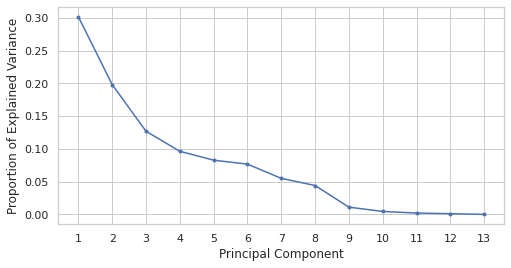

In [104]:
pca = PCA()
pca.fit(X_train)

fig, ax = plt.subplots(figsize=(8,4))

plt.plot(range(1, 14), pca.explained_variance_ratio_[:14], marker = '.')
plt.xticks(ticks = range(1, 14))
plt.xlabel('Principal Component')
plt.ylabel('Proportion of Explained Variance');

In [105]:
applied_pca = PCA(n_components = 8)
X_train_pca = applied_pca.fit_transform(X_train)
X_test_pca = applied_pca.transform(X_test)

In [106]:
difference = X_train.shape[1] - X_train_pca.shape[1]

print(f'There are {difference} fewer columns after applying PCA')

variance = applied_pca.explained_variance_ratio_.sum()
print(f'The pca explains {variance:.2f} percent of the variance of the original data')

There are 5 fewer columns after applying PCA
The pca explains 0.98 percent of the variance of the original data


In [107]:
input_shape = X_train_pca.shape[1]
input_shape

8

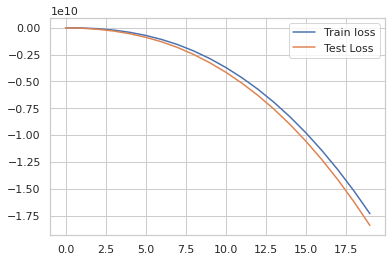

In [108]:
model = Sequential()
# First hidden layer
model.add(Dense(10, # How many neurons you have in your first hidden layer
                input_dim = input_shape, # What is the shape of your input features (number of columns)
                activation = 'relu')) # What activation function are you using?
# Second hidden layer
model.add(Dense(5, # How many neurons you have in your second hidden layer
                activation = 'relu')) # What activation function are you using?
model.add(Dense(1, activation = 'sigmoid'))
# Step 2: Compile
model.compile(loss = 'bce', optimizer = 'adam')
history = model.fit(X_train_pca, y_train,
                        validation_data = (X_test_pca, y_test),
                        epochs = 20, verbose=0)

# Visualization
plt.plot(history.history['loss'], label='Train loss')
plt.plot(history.history['val_loss'], label='Test Loss')
plt.legend();